In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import h5py
import matplotlib.pyplot as plt

In [2]:
with h5py.File(r'D:\Ali_Thesis\synthetic_data_generation\Data\Process_canada_data\P13_5_sec_30hz_sequences_sensor_data.h5', 'r') as f:
    X5 = f['data'][:]
    print(f"Loaded data shape: {X5.shape}")

Loaded data shape: (417840, 6, 150)


In [3]:
with h5py.File(r'D:\Ali_Thesis\synthetic_data_generation\Data\Process_canada_data\P13_5_sec_30hz_sequences_sensor_data_normalized.h5', 'r') as f:
    X5_norm = f['data'][:]
    print(f"Loaded data shape: {X5_norm.shape}")

Loaded data shape: (417840, 6, 150)


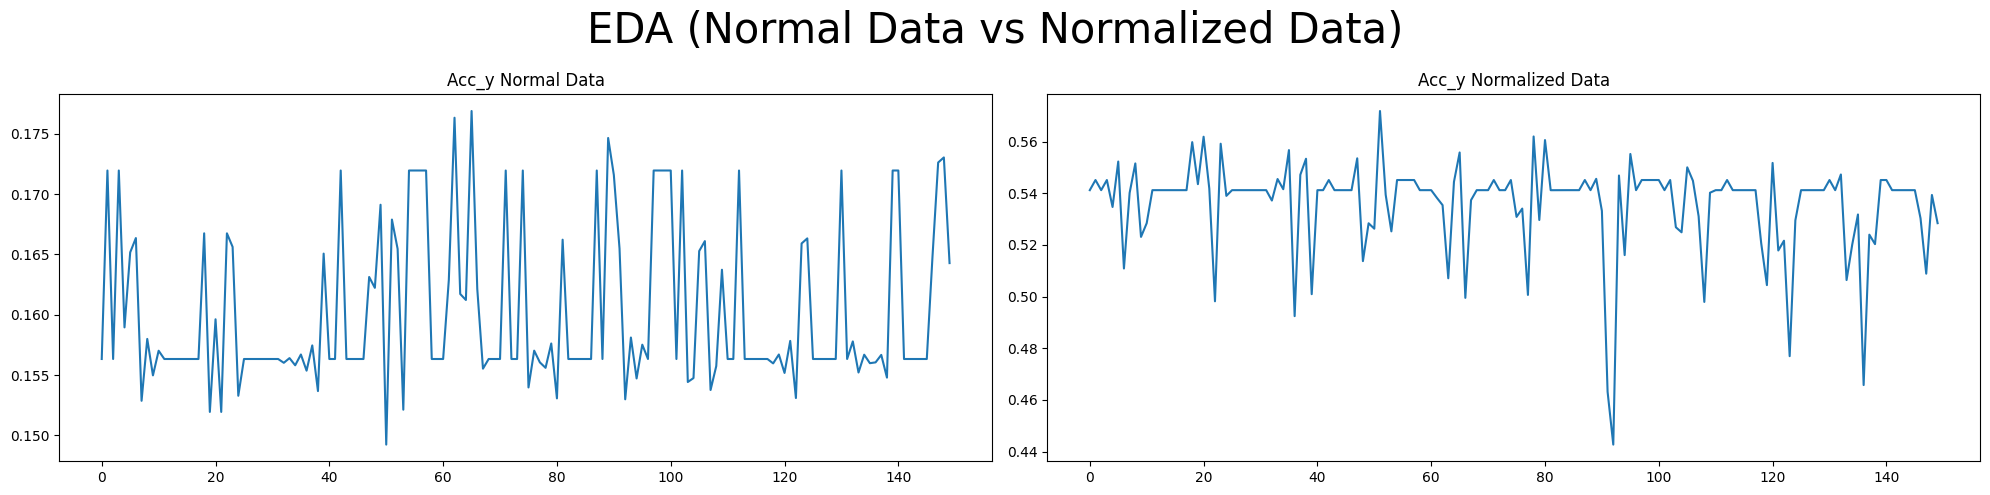

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))

fig.suptitle(f'EDA (Normal Data vs Normalized Data)', fontsize=30)

axs[0].plot(X5[1,2,:])
axs[0].title.set_text('Acc_y Normal Data')

axs[1].plot(X5_norm[1,2,:])
axs[1].title.set_text('Acc_y Normalized Data')

# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
print(np.min(X5[:,0,:]))
print(np.max(X5[:,0,:]))

-0.2269217156272
15.9909666756601


In [ ]:
# Extract the specific slice for testing (:, 0, :)
eda = X5[:, 0, :]

# Apply Standard Scaling
scaler_standard = StandardScaler()
eda_sds = scaler_standard.fit_transform(eda)

# Apply Min-Max Scaling
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
eda_mms = scaler_minmax.fit_transform(eda)

# Verify the transformed shapes remain the same
eda_sds.shape, eda_mms.shape

((417840, 150), (417840, 150))

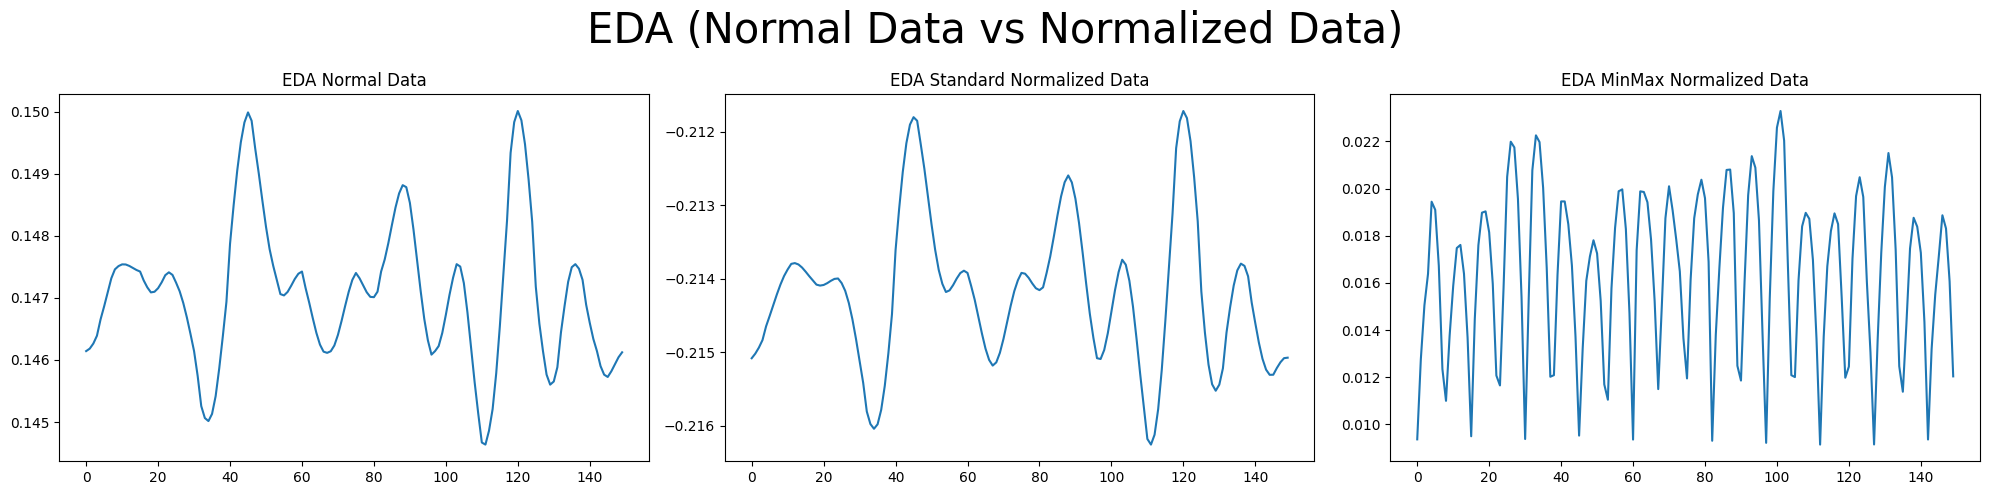

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))

fig.suptitle(f'EDA (Normal Data vs Normalized Data)', fontsize=30)

axs[0].plot(eda[0, :])
axs[0].title.set_text('EDA Normal Data')

axs[1].plot(eda_sds[0, :])
axs[1].title.set_text('EDA Standard Normalized Data')

axs[2].plot(eda_mms[0, :])
axs[2].title.set_text('EDA MinMax Normalized Data')

# Adjust layout
plt.tight_layout()
plt.show()